<a href="https://colab.research.google.com/github/ppraveenhalingali/OASIS-INFOBYTE/blob/main/Unemployment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# -----------------------------------------------------
# 1. SETUP AND DATA LOADING
# -----------------------------------------------------

# Install plotly-express for advanced plotting (Geospatial analysis)
!pip install plotly-express

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plotting style for better visualization
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

# Load the datasets
# NOTE: In Colab, you will typically upload the files directly, or mount Google Drive.
# If you are mounting Google Drive, you will use a path like '/content/drive/MyDrive/...'
df_india = pd.read_csv("Unemployment in India.csv")
df_geo = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

print("Data Loaded Successfully!")
print("\nUnemployment in India (First 5 rows):")
print(df_india.head())
print("\nUnemployment Rate upto 11-2020 (First 5 rows):")
print(df_geo.head())

Data Loaded Successfully!

Unemployment in India (First 5 rows):
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  

Unemployment Ra

In [3]:
# -----------------------------------------------------
# 2. DATA CLEANING AND PREPROCESSING (Focusing on df_india)
# -----------------------------------------------------

# Remove the leading/trailing spaces from all column names
df_india.columns = df_india.columns.str.strip()

# Rename columns for easier handling
df_india.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'LPR',
    'Region': 'State'
}, inplace=True)

# Convert the 'Date' column to datetime objects
df_india['Date'] = pd.to_datetime(df_india['Date'], dayfirst=True)

# Check for and handle missing values (Dropping for simplicity in this project)
df_india.dropna(inplace=True)

print("--- Cleaned Data Info ---")
print(df_india.info())
print("\nCleaned Data Head:")
print(df_india.head())

--- Cleaned Data Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   State              740 non-null    object        
 1   Date               740 non-null    datetime64[ns]
 2   Frequency          740 non-null    object        
 3   Unemployment Rate  740 non-null    float64       
 4   Employed           740 non-null    float64       
 5   LPR                740 non-null    float64       
 6   Area               740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB
None

Cleaned Data Head:
            State       Date Frequency  Unemployment Rate    Employed    LPR  \
0  Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0  43.24   
1  Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0  42.05   
2  Andhra Pradesh 2019-07-31   Monthly     

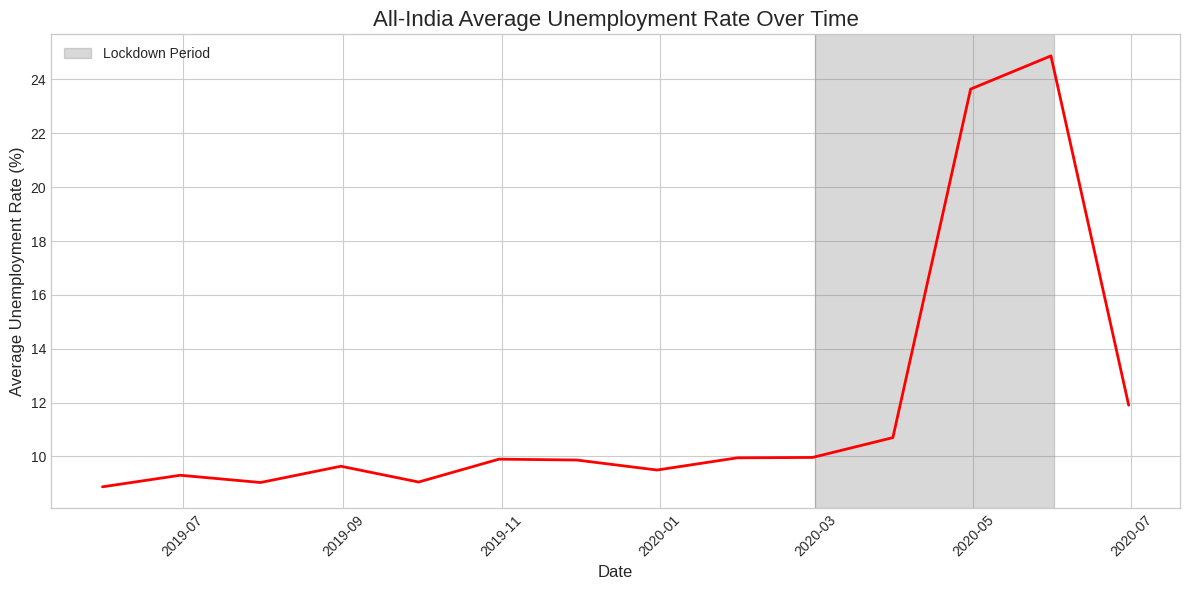

In [4]:
# -----------------------------------------------------
# 3. TIME-SERIES ANALYSIS: National Unemployment Trend
# -----------------------------------------------------

# Calculate the national average unemployment rate per month
# Group by date and calculate the mean Unemployment Rate
unemployment_trend = df_india.groupby('Date')['Unemployment Rate'].mean().reset_index()

# Set up the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemployment_trend, x='Date', y='Unemployment Rate', color='red', linewidth=2)

# Highlight the COVID-19 lockdown period (March-May 2020)
plt.axvspan(pd.to_datetime('2020-03-01'), pd.to_datetime('2020-06-01'), color='gray', alpha=0.3, label='Lockdown Period')

# Add annotations and titles
plt.title('All-India Average Unemployment Rate Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Unemployment Rate (%)', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# You can save the figure to your Colab environment if needed
# plt.savefig('national_unemployment_trend.png')

/tmp/ipython-input-2623947544.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


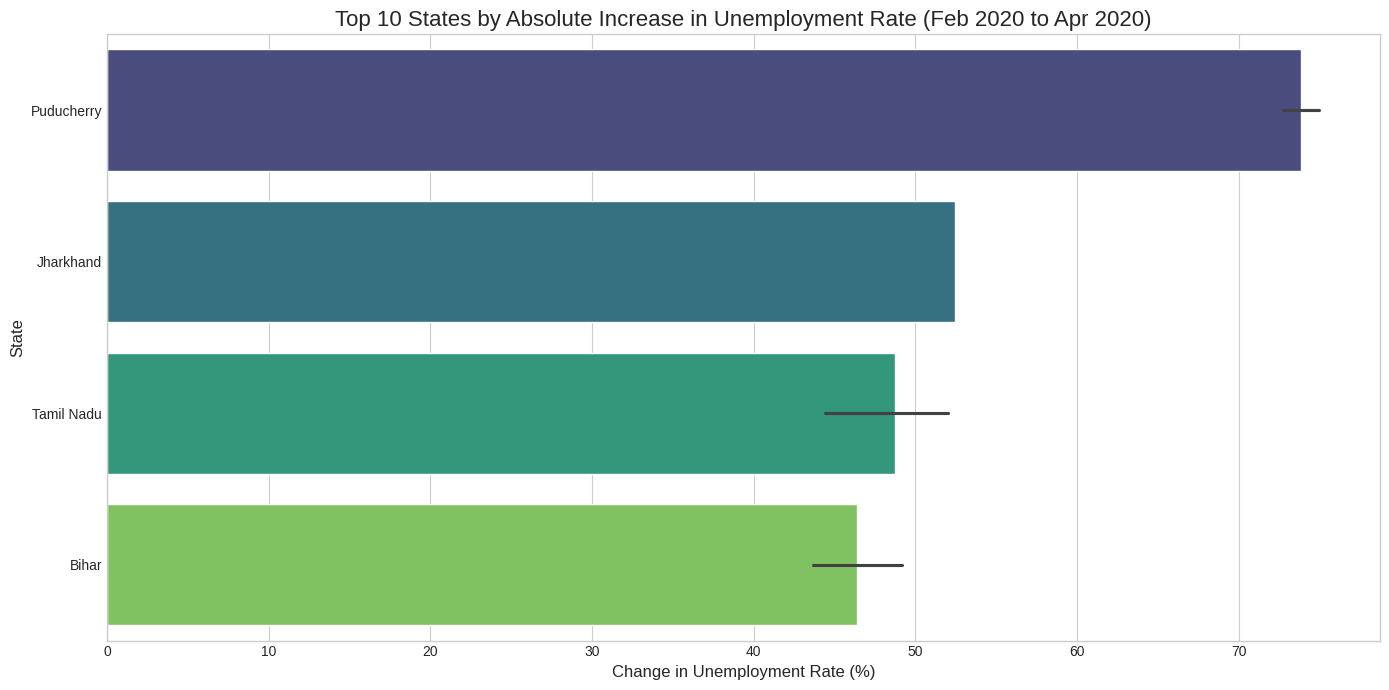

In [5]:
# -----------------------------------------------------
# 4. REGIONAL ANALYSIS: Pre-COVID vs. Peak-COVID
# -----------------------------------------------------

# Define key periods
pre_covid_month = '2020-02-29' # End of Feb 2020
peak_covid_month = '2020-04-30' # End of April 2020 (Peak Lockdown)

# Filter data for the two comparison periods
df_pre_covid = df_india[df_india['Date'] == pre_covid_month].reset_index(drop=True)
df_peak_covid = df_india[df_india['Date'] == peak_covid_month].reset_index(drop=True)

# Merge the two dataframes for comparison
comparison_df = pd.merge(
    df_pre_covid[['State', 'Unemployment Rate']],
    df_peak_covid[['State', 'Unemployment Rate']],
    on='State',
    suffixes=('_Pre', '_Peak')
)

# Calculate the absolute change in unemployment rate
comparison_df['Rate Change'] = comparison_df['Unemployment Rate_Peak'] - comparison_df['Unemployment Rate_Pre']

# Sort by the change to see the most impacted states
comparison_df_sorted = comparison_df.sort_values(by='Rate Change', ascending=False)

# Visualize the top 10 most impacted states (by change in rate)
plt.figure(figsize=(14, 7))
sns.barplot(
    data=comparison_df_sorted.head(10),
    x='Rate Change',
    y='State',
    palette='viridis'
)
plt.title('Top 10 States by Absolute Increase in Unemployment Rate (Feb 2020 to Apr 2020)', fontsize=16)
plt.xlabel('Change in Unemployment Rate (%)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()

In [6]:
# -----------------------------------------------------
# 5. GEOSPATIAL ANALYSIS (Using plotly-express and df_geo)
# -----------------------------------------------------

# Clean the second dataset (df_geo) similar to df_india
df_geo.columns = df_geo.columns.str.strip()
df_geo.rename(columns={
    'Region.1': 'Region_Group', # This is the broader regional classification (e.g., South, North)
    'Estimated Unemployment Rate (%)': 'Unemployment Rate',
    'Region': 'State'
}, inplace=True)
df_geo.dropna(inplace=True)

# Filter for the peak unemployment month
df_peak_geo = df_geo[df_geo['Date'] == '30-04-2020'].reset_index(drop=True)

# Create an interactive scatter map using plotly
# This visualizes the unemployment rate at the state's coordinates
fig = px.scatter_geo(
    df_peak_geo,
    lat='latitude',
    lon='longitude',
    hover_name='State',
    size='Unemployment Rate',
    color='Unemployment Rate',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='State-wise Unemployment Rate during Peak Lockdown (April 2020)',
    scope='asia' # Set the scope to Asia to center on India
)

# Customize the map layout to focus on India
fig.update_geos(
    lataxis_range=[5, 35],
    lonaxis_range=[65, 100],
    oceancolor='#EAF4F4',
    showocean=True
)

fig.show()

# NOTE: In a Colab notebook, fig.show() will render the interactive map directly.